In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

## Table Review: Welcome Survey

In [2]:
welcome = Table.read_table('welcome_survey_v1.csv')
welcome.show(5)

Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position
4,6,4,Both,I don't know,On your back
8,6,7,Both,I don't know,On your back
9,6,7,Both,I don't know,On your back
2,3,6.75,Left-handed,I don't know,On your back
7,10,7,Left-handed,I don't know,On your back


In [3]:
# On average, how long do side-sleepers sleep?
side_sleepers = welcome.where('Sleep position', are.containing('side'))
np.average(side_sleepers.column('Hours of sleep'))

7.031403940886699

In [4]:
# How many students get at least 8 hours of sleep each night (on average)?
# First way:
welcome.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

417

In [5]:
# Second way
np.count_nonzero(welcome.column('Hours of sleep') >= 8)

417

In [6]:
# Third way
np.sum(welcome.column('Hours of sleep') >= 8)

417

In [7]:
# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome.select('Hours of sleep', 'Sleep position')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
4,On your back
7,On your back
7,On your back


In [8]:
# Second way
two_col = welcome.drop('Handedness', 'Extraversion', 'Pant leg')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position,Sleep position
6,4,On your back
6,7,On your back
6,7,On your back


## Discussion Question: NBA Salaries

In [10]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba.show(3)

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625


In [15]:
# Question (a)
guards = nba.where('POSITION', 'PG')
guards.where('SALARY', are.above(15)).column('PLAYER')

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], dtype='<U24')

In [12]:
# Question (b)
nba.drop('POSITION')
nba.num_columns

3

## Census ##

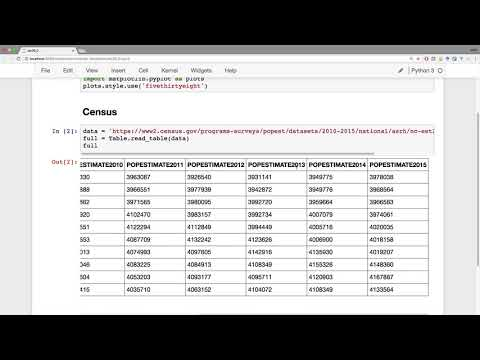

In [2]:
#https://www.youtube.com/watch?v=b29OrPn5ofw
from IPython.display import YouTubeVideo

YouTubeVideo('b29OrPn5ofw', width=800, height=300)

In [19]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [20]:
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')
partial.show(4)

SEX,AGE,CENSUS2010POP,POPESTIMATE2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [21]:
simple = partial.relabeled(2, '2010').relabeled(3, '2014')
simple.show(4)

SEX,AGE,2010,2014
0,0,3944153,3948350
0,1,3978070,3962123
0,2,4096929,3957772
0,3,4119040,4005190


In [22]:
simple.sort('AGE')

SEX,AGE,2010,2014
0,0,3944153,3948350
1,0,2014276,2017857
2,0,1929877,1930493
0,1,3978070,3962123
1,1,2030853,2023253
2,1,1947217,1938870
0,2,4096929,3957772
1,2,2092198,2022502
2,2,2004731,1935270
0,3,4119040,4005190


In [23]:
simple.sort('AGE', descending=True)

SEX,AGE,2010,2014
2,999,156964212,161920569
1,999,151781326,156936487
0,999,308745538,318857056
2,100,44202,58468
1,100,9162,13729
0,100,53364,72197
2,99,26193,32791
1,99,6073,9037
0,99,32266,41828
2,98,36641,46536


## Visualization ##

In [24]:
no_999 = simple.where('AGE', are.below(999))
everyone = no_999.where('SEX', 0).drop('SEX')

In [25]:
everyone

AGE,2010,2014
0,3944153,3948350
1,3978070,3962123
2,4096929,3957772
3,4119040,4005190
4,4063170,4003448
5,4056858,4004858
6,4066381,4134352
7,4030579,4154000
8,4046486,4119524
9,4148353,4106832


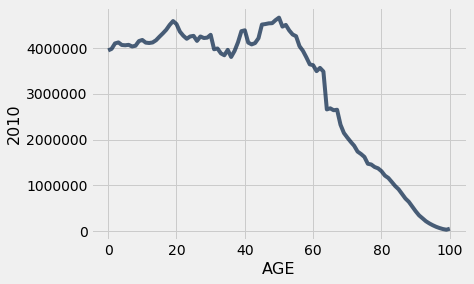

In [26]:
everyone.plot('AGE', '2010')